# Multiple Linear Regression
## Car Price Prediction

#### Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

-Which variables are significant in predicting the price of a car
-How well those variables describe the price of a car

In [1]:
import warnings
warnings.filterwarnings('ignore')

# importing the libraries for data reading the file and data manuplation
import numpy as np
import pandas as pd

#importing libraries for data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#importing Sklearn libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#importing Statsmodels libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Step 1: Reading and Understanding the Data

In [51]:
# Importing dataset
car_price = pd.read_csv("CarPrice_Assignment.csv")
# Check the head of the dataset
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [52]:
car_price.shape

(205, 26)

In [53]:
#Inspecting the data type and missing values of the dataframe
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [54]:
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [55]:
car_price.describe(include = "all")

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corolla,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


#### Summary:
- 202 out of 205 cars have engine at the front so only 3 cars have engine location at rear
- Car ID has all unique values

In [56]:
#Drop the column car_ID as this is not required for analysis
car_price = car_price.drop("car_ID", axis =1)

##### Conversion of  column values and adding new columns

In [57]:
# Extracting the car manufacturer from the column CarName
car_price["CarName"]= car_price["CarName"].str.split(" ", n = 1, expand = True)
car_price.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [58]:
# correcting the comapny names which are wrongly labled
car_price["CarName"]=car_price["CarName"].replace({'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','vokswagen':'volkswagen',
                                              'vw':'volkswagen','toyouta':'toyota'})
car_price.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [59]:
# creating a new column for mpg which is avg of highway mpg and city mpg as they both represent the milage
car_price['avg_mpg'] = (car_price['citympg']+car_price['highwaympg'])/2
car_price.drop(['citympg','highwaympg'], inplace = True, axis =1)

In [60]:
# converting no of cylinders from catagorical column to numeric
car_price["cylindernumber"]=car_price["cylindernumber"].replace({'two':2,'three':3,'four':4,'five':5,'six':6,
                                                                 'eight':8,'twelve':12})

## Univaiate analusis for the dependant variable (Price)

0.25     7788.0
0.50    10295.0
0.75    16503.0
Name: price, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x2c55af65d48>,
 'caps': [<matplotlib.lines.Line2D at 0x2c55af7aec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c55af7a6c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2c55af7eec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c55af7ef48>],
 'means': []}

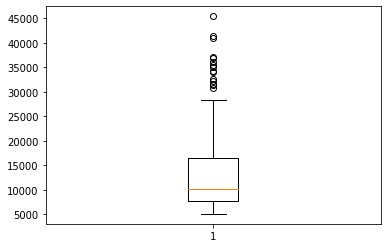

In [61]:
print(car_price["price"].quantile( q=[0.25,0.5,0.75]))
plt.boxplot(car_price["price"])

##### 25% of the cars are below the price  of 7788 and 25 % of the car prices are above 16503 there are few outliers for price.

## Step 2: Visualising the Data

#### Visualising Numeric Variables

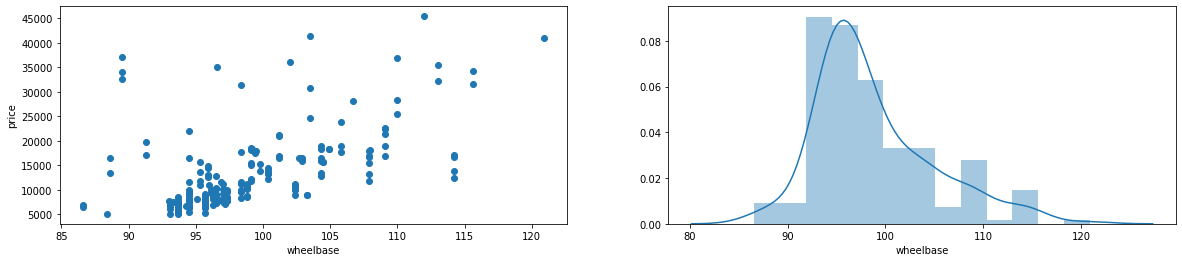

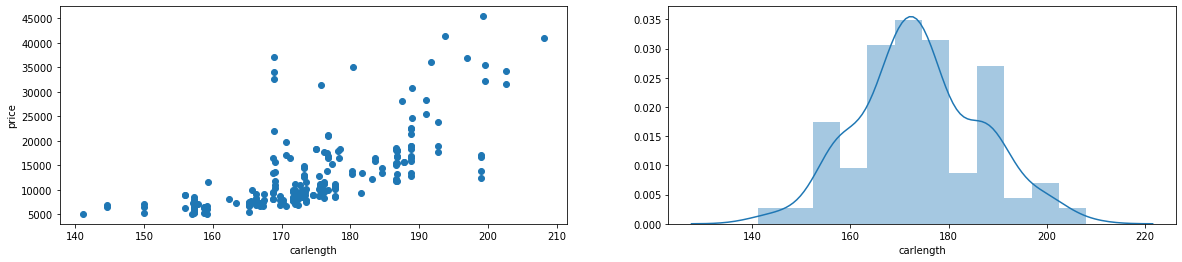

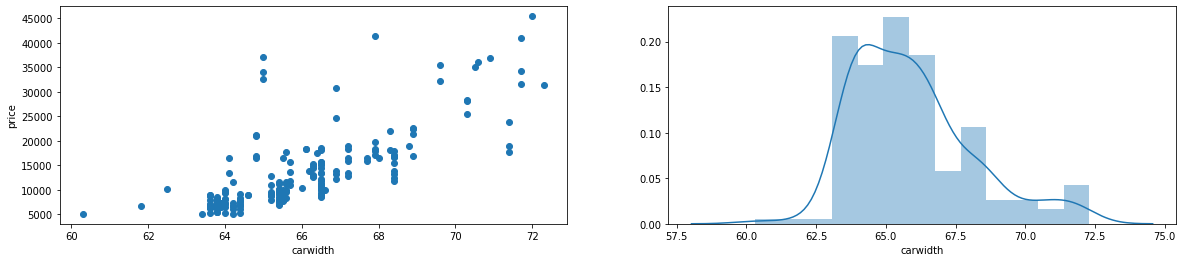

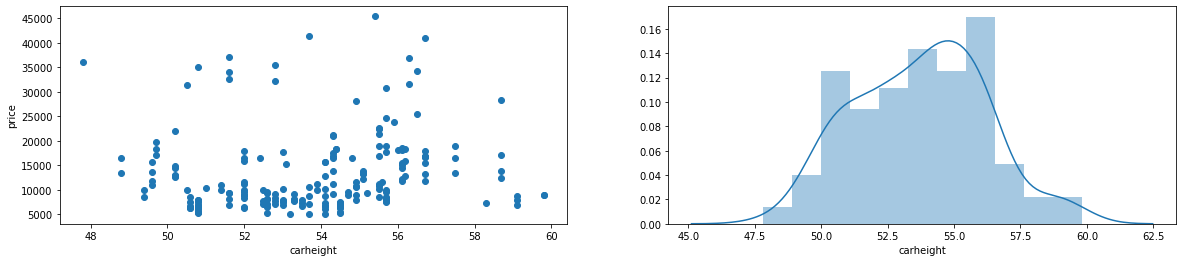

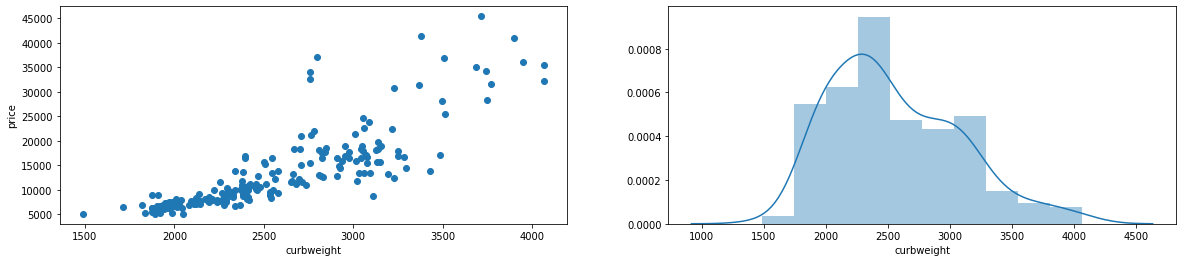

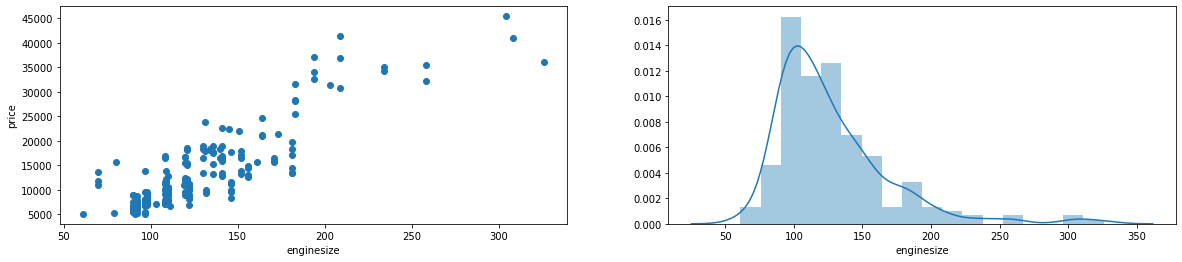

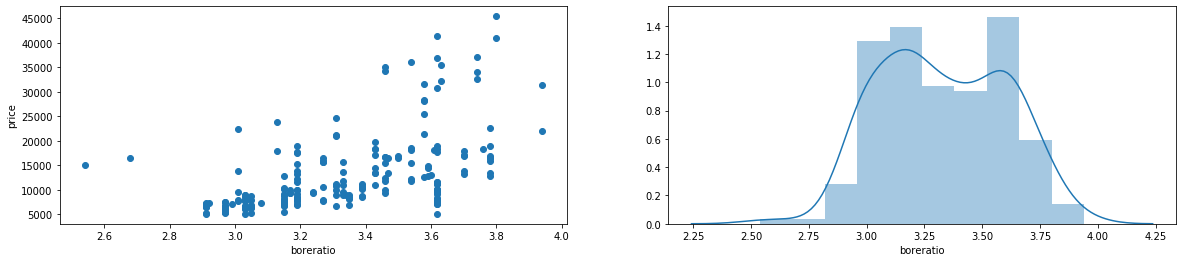

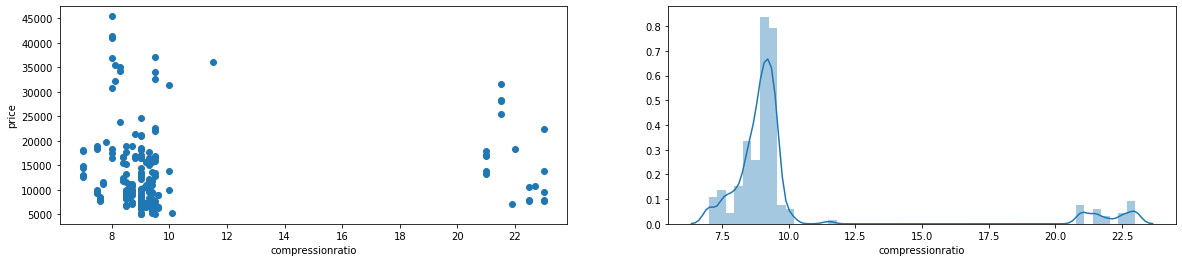

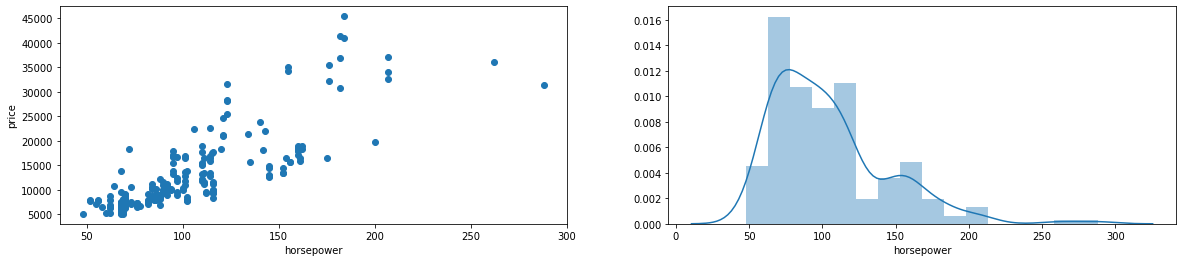

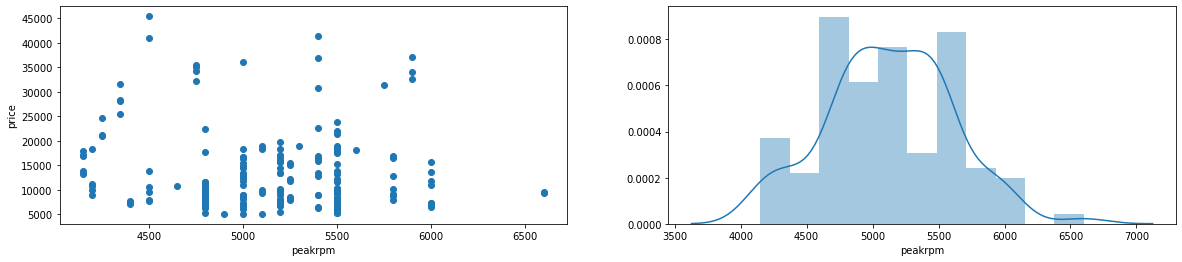

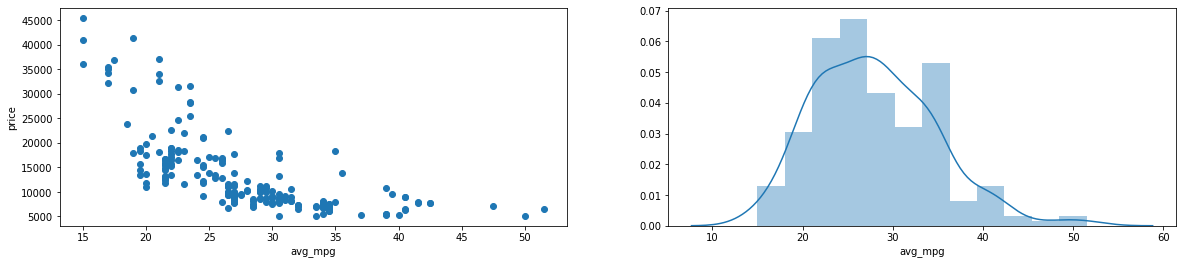

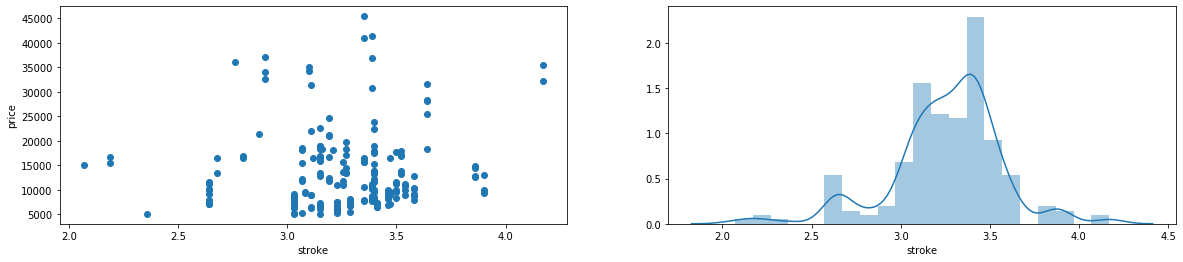

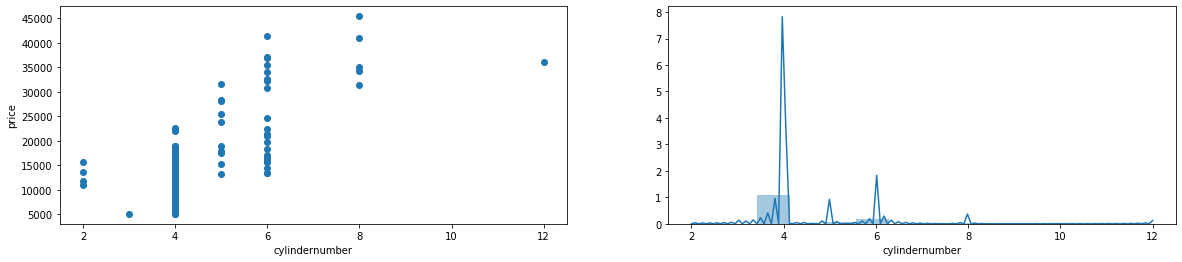

In [13]:
col_cont= ['wheelbase','carlength','carwidth', 'carheight', 'curbweight','enginesize', 
           'boreratio', 'compressionratio','horsepower', 'peakrpm', 'avg_mpg','stroke','cylindernumber']
for i in col_cont:
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    plt.scatter(x= i, y = "price", data =car_price)
    plt.xlabel(i)
    plt.ylabel("price")
    plt.subplot(1,2,2)
    sns.distplot(car_price[i])
#     plt.xlabel(col_cont[i+1])
#     plt.ylabel("price")
    plt.show()

#### Inferences:
The following columns do not have any linear relationship with price
     - compressionratio
     - stroke
     - carheight
     - peakrpm

In [62]:
# dropping columns which has no linear relationship with price
car_price = car_price.drop(["compressionratio","stroke","carheight","peakrpm"],axis = 1)

#### Visualising Categorical Variables

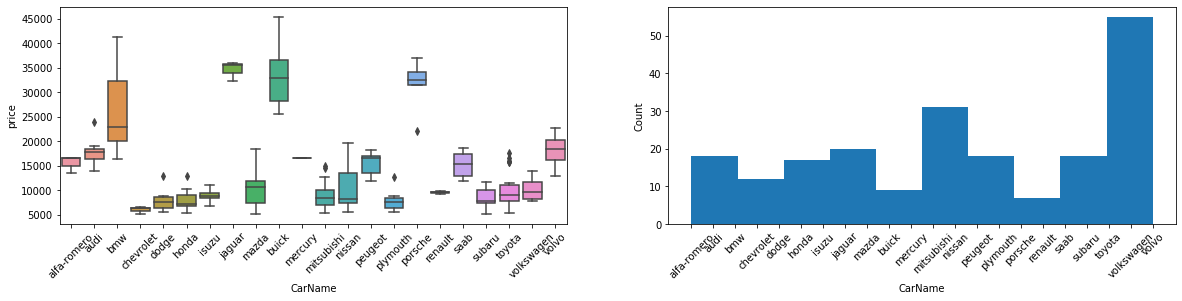

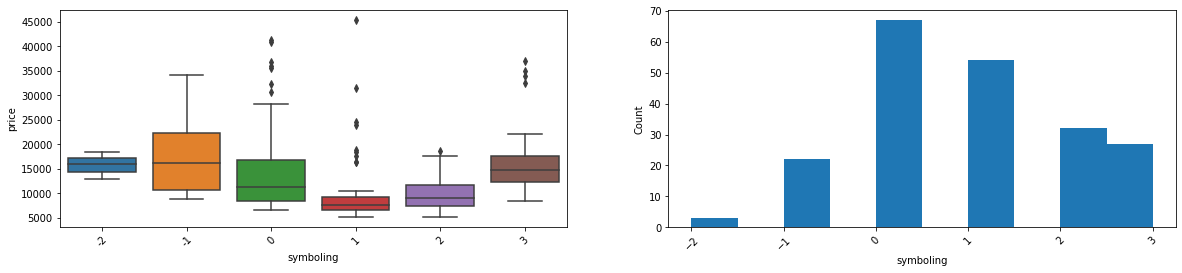

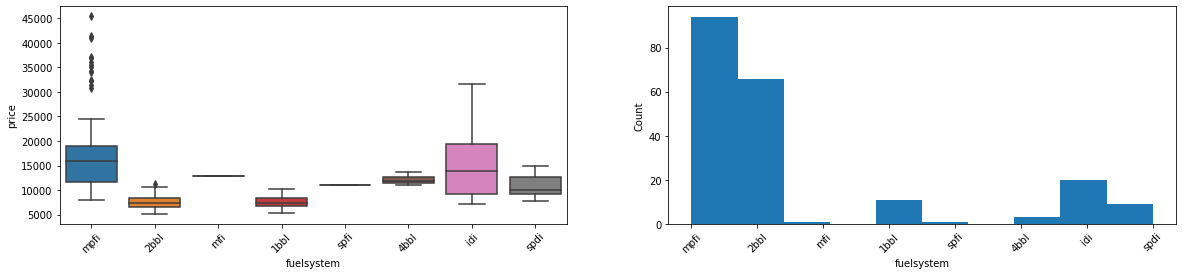

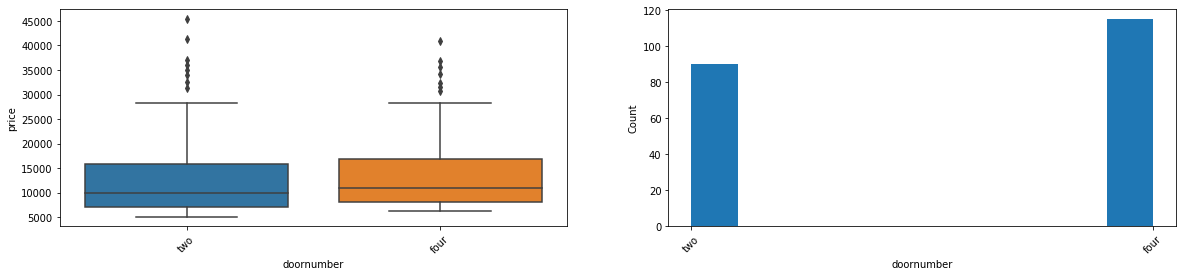

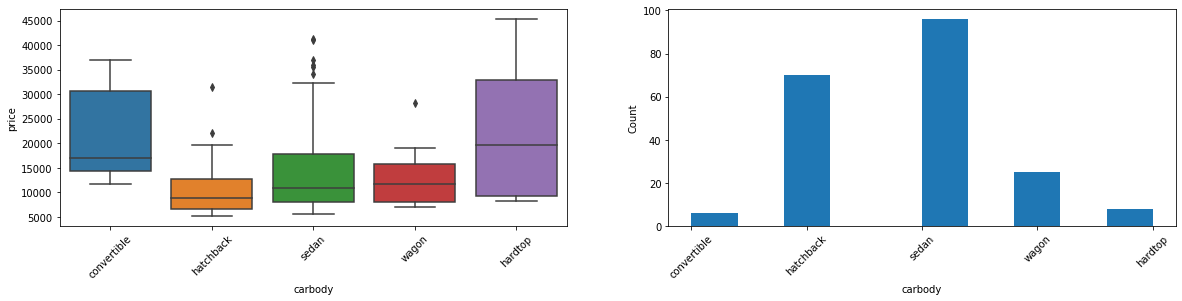

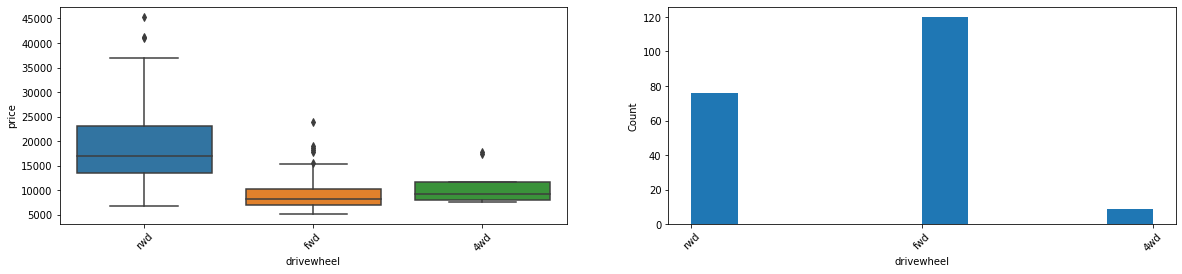

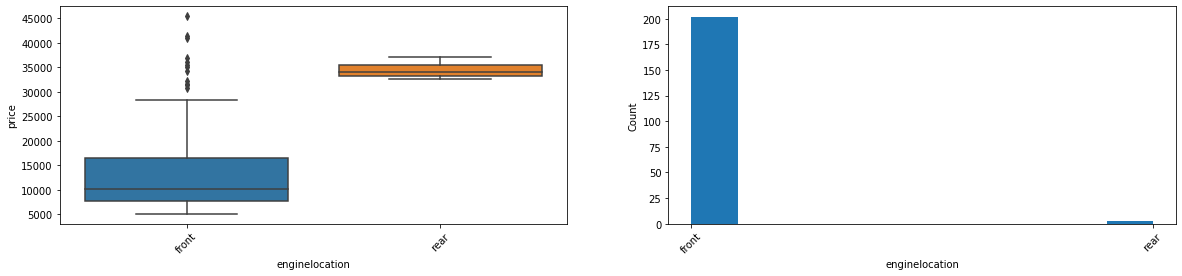

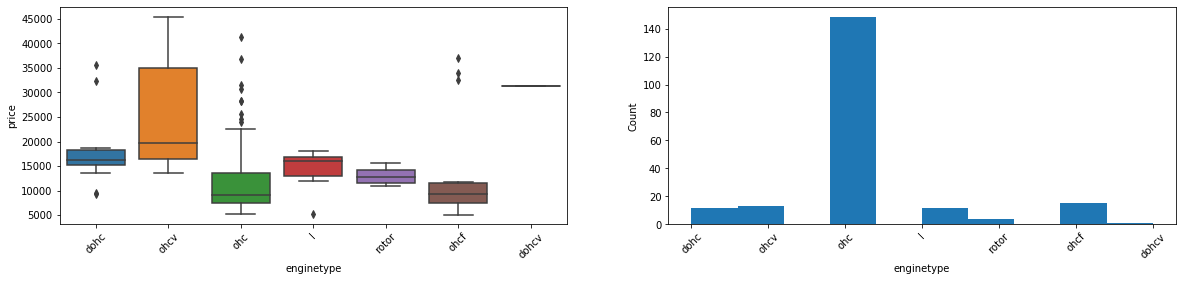

In [15]:
cat_columns = ['CarName','symboling','fuelsystem','doornumber','carbody','drivewheel','enginelocation',
               'enginetype']
def catagory_plot(x,car_price):
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    sns.boxplot(x = x, y = 'price', data = car_price)
    plt.xlabel(x)
    plt.ylabel("price")
    plt.xticks(rotation=45)
    plt.subplot(1,2,2)
    plt.hist(x, data = car_price)
    plt.xlabel(x)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
for items in cat_columns:
    catagory_plot(items,car_price)

#### Inferences:
     - Although the price is high when the engine location is in rear but the data points are very less.
     - No of doors does not have any significant impact on the price
     - most of the high end cars have engine type as ohc.

In [63]:
# Dropping column door no and engine location as the distribution for 2 door and four door are similar
car_price = car_price.drop(["doornumber","enginelocation"],axis =1)

## Pair plot to see the relationship between the continuos variables

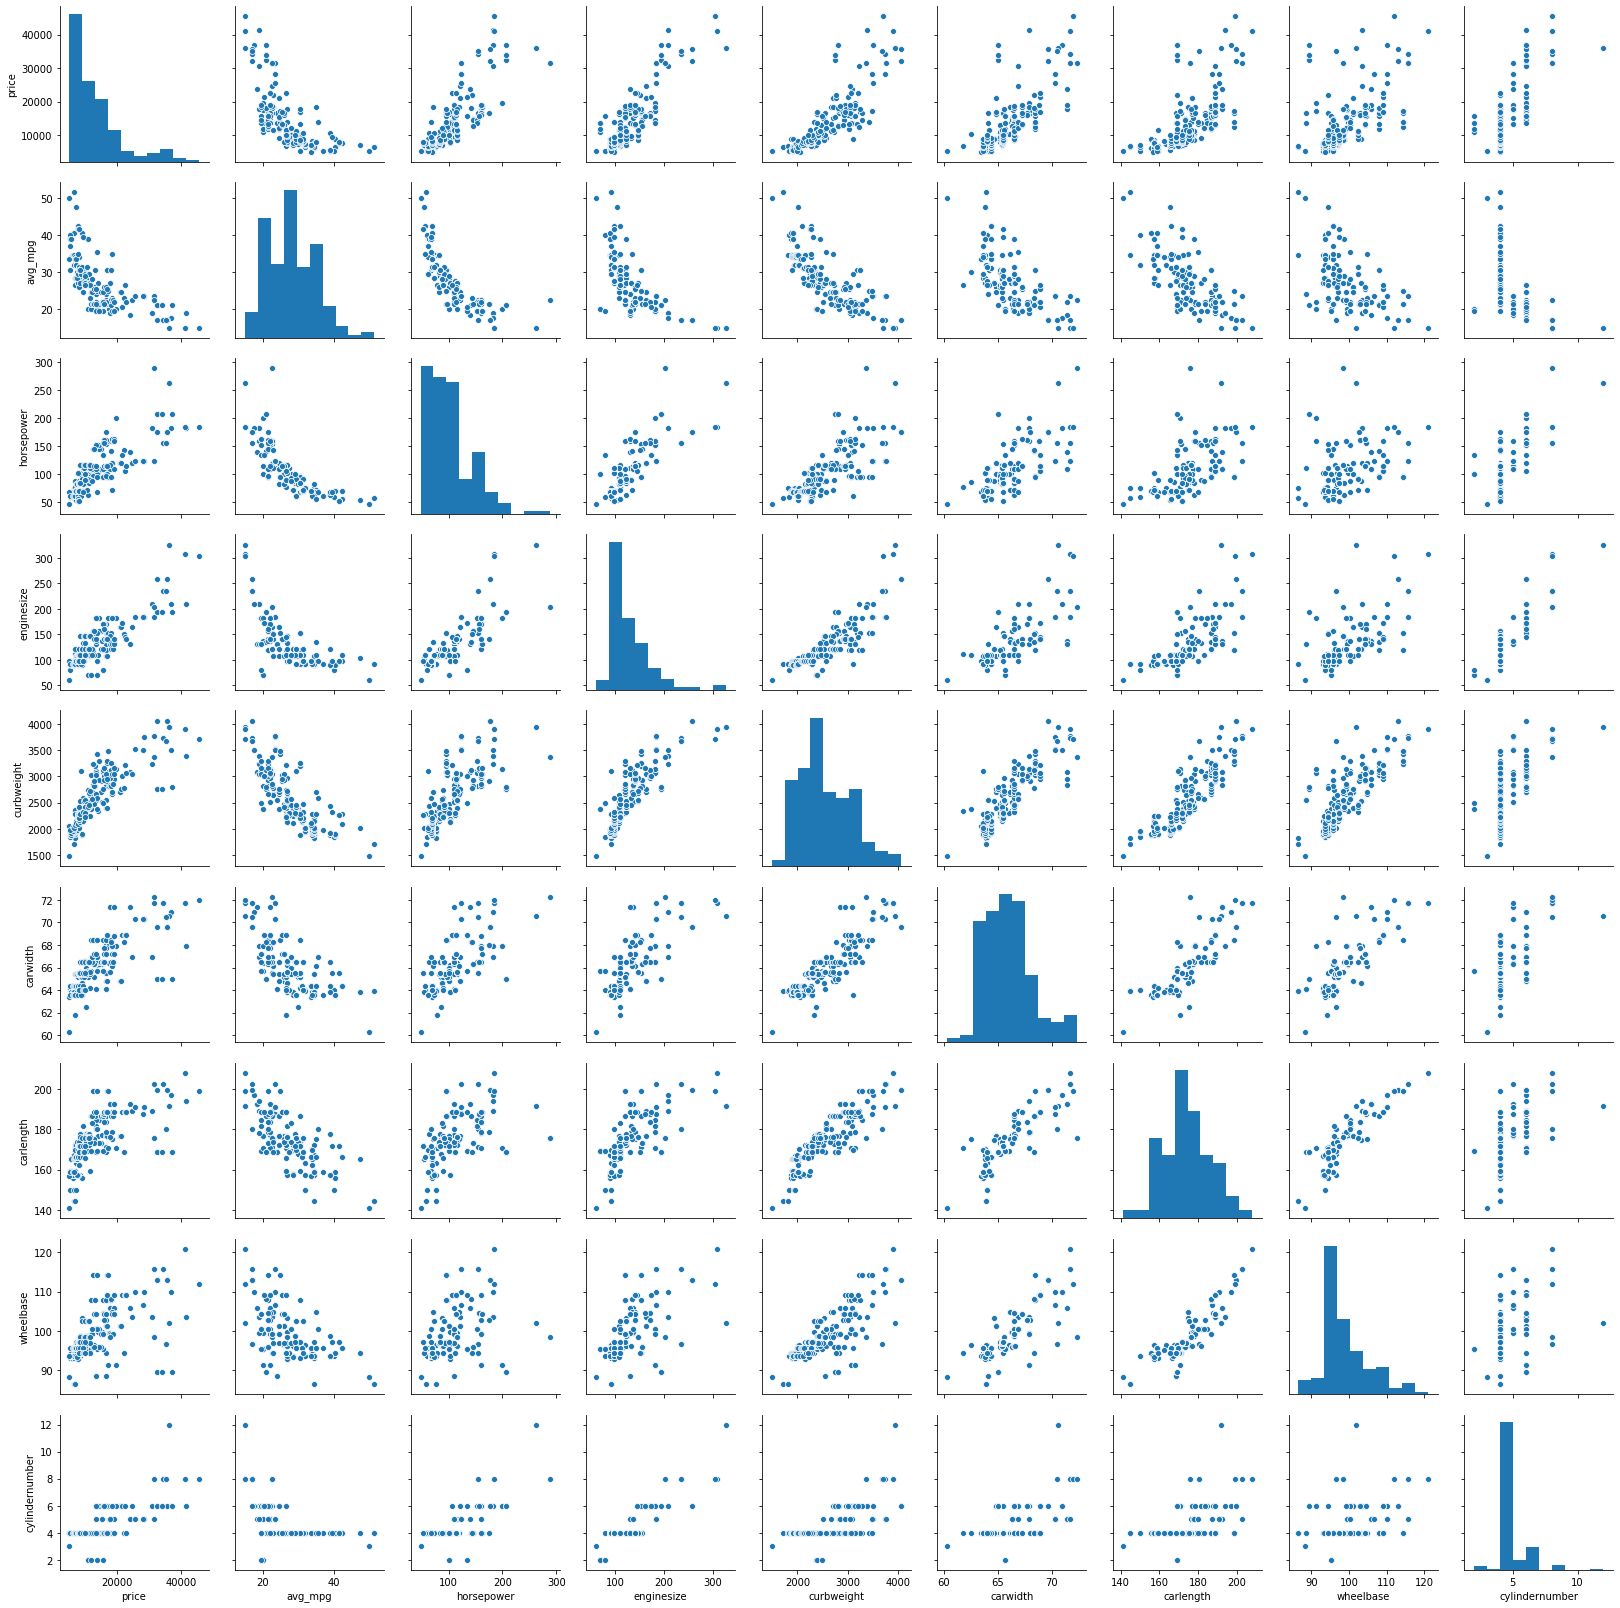

In [17]:
car_price1 = car_price[['price','avg_mpg','horsepower','enginesize','curbweight','carwidth','carlength','wheelbase',
                       'cylindernumber']]
sns.pairplot(car_price1)
plt.show()

### Inferences:
- Car Price is linear relationship with  few of the paramters like horse power, engine size, car length and car width. 
- Car price is negetively corelated with avg_mpg
- highwaympg and city mpg are very highly corelated
- Peak RPM and car height does not have a strong linear relationship with car price

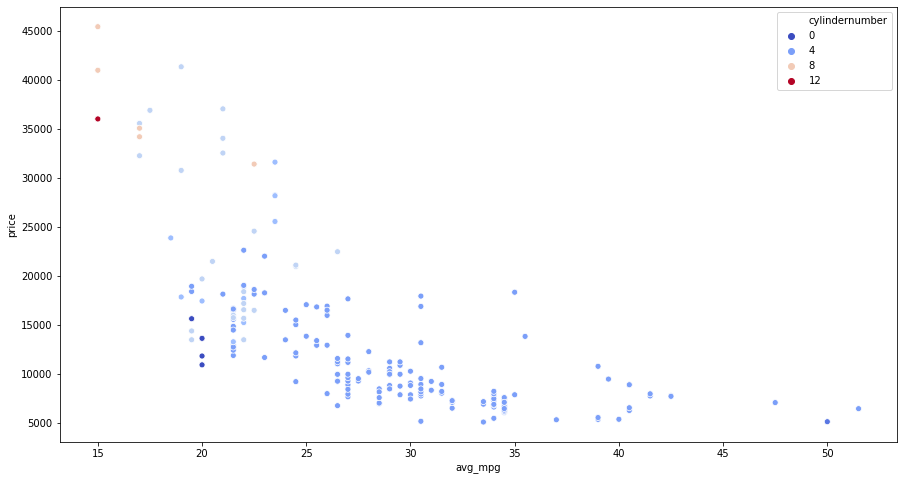

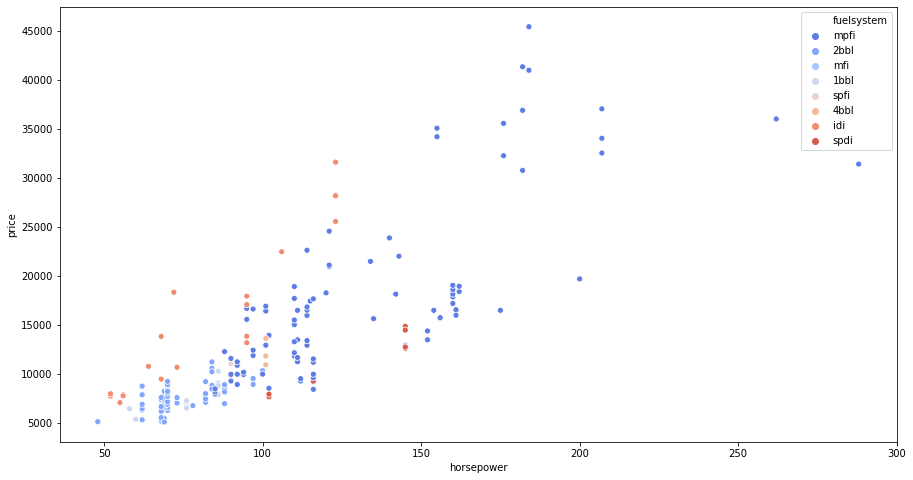

In [74]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="avg_mpg", y = "price", hue = "cylindernumber", palette="coolwarm", data =car_price)
plt.show()
plt.figure(figsize=(15,8))
sns.scatterplot(x="horsepower", y = "price", hue = "fuelsystem", palette="coolwarm", data =car_price)
plt.show()


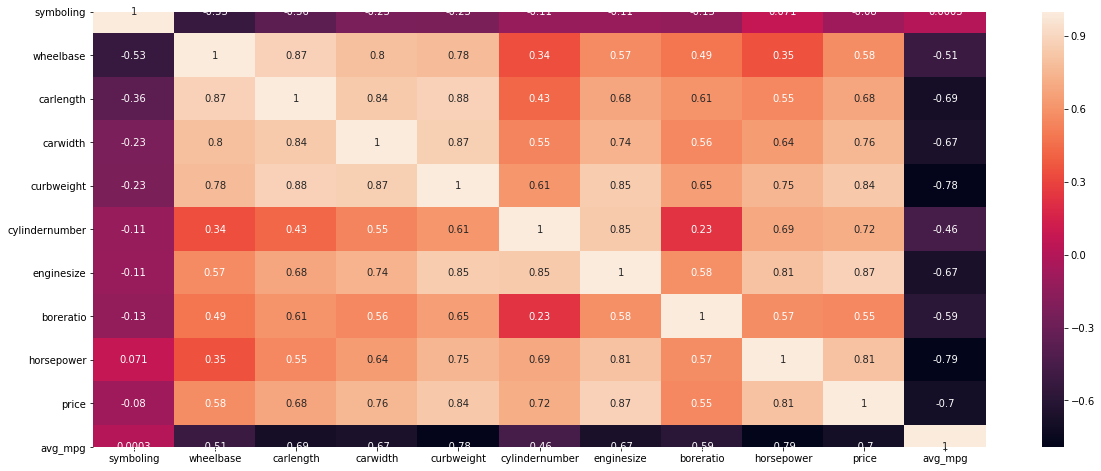

In [18]:
plt.figure(figsize=(20,8))
sns.heatmap(car_price.corr(),annot = True)

## Step 3: Data Preparation

#### Converting catagory columns with binary values as 0 or 1 

In [19]:
# since few of the columns have binary values We can convert those to 1 and 0
car_price["fueltype"]=car_price["fueltype"].map({"gas":1,'diesel':0})
car_price["aspiration"]=car_price["aspiration"].map({"std":1,'turbo':0})

#### Creating Dummy columns for the catagorical variables

In [20]:
# Get the dummy variables for the catagorical features
cat_col = ["symboling","fuelsystem","carbody","drivewheel","enginetype","CarName"]
def create_dummy(x,df):
    dummy = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, dummy], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
for items in cat_col:
    car_price = create_dummy(items,car_price)


In [21]:
car_price.columns

Index([      'fueltype',     'aspiration',      'wheelbase',      'carlength',
             'carwidth',     'curbweight', 'cylindernumber',     'enginesize',
            'boreratio',     'horsepower',          'price',        'avg_mpg',
                     -1,                0,                1,                2,
                      3,           '2bbl',           '4bbl',            'idi',
                  'mfi',           'mpfi',           'spdi',           'spfi',
              'hardtop',      'hatchback',          'sedan',          'wagon',
                  'fwd',            'rwd',          'dohcv',              'l',
                  'ohc',           'ohcf',           'ohcv',          'rotor',
                 'audi',            'bmw',          'buick',      'chevrolet',
                'dodge',          'honda',          'isuzu',         'jaguar',
                'mazda',        'mercury',     'mitsubishi',         'nissan',
              'peugeot',       'plymouth',        'p

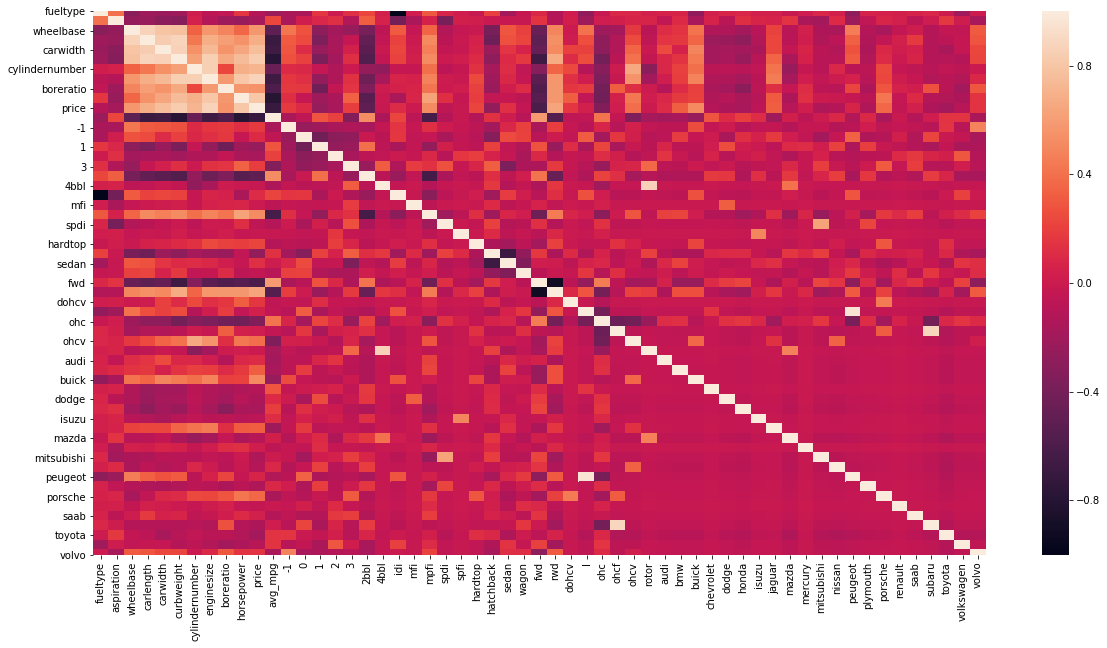

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(car_price.corr())

#### The following parameters are highly positively co-related to each other:
   - Wheel Base
   - Car Legth
   - Car Width
   - Curbweight
   - engine size
   - bore ratio
   - horse power

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [23]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_price, train_size = 0.7, test_size = 0.3, random_state = 100)

In [24]:
scaler = MinMaxScaler()

In [25]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth','curbweight', 'enginesize', 'boreratio', 
            'horsepower', 'avg_mpg', 'cylindernumber','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [26]:
df_train.head()

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,1,1,0.244828,0.426016,0.291667,0.272692,0.2,0.139623,0.230159,0.083333,...,0,0,1,0,0,0,0,0,0,0
125,1,1,0.272414,0.452033,0.666667,0.500388,0.2,0.339623,1.000000,0.395833,...,0,0,0,1,0,0,0,0,0,0
166,1,1,0.272414,0.448780,0.308333,0.314973,0.2,0.139623,0.444444,0.266667,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0.068966,0.450407,0.316667,0.411171,0.2,0.260377,0.626984,0.262500,...,0,0,0,0,0,0,0,0,0,0
199,1,0,0.610345,0.775610,0.575000,0.647401,0.2,0.260377,0.746032,0.475000,...,0,0,0,0,0,0,0,0,0,1


In [27]:
df_train.describe()

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.909091,0.818182,0.411141,0.525476,0.461655,0.407878,0.240559,0.241351,0.497946,0.227302,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.288490,0.387050,0.205581,0.204848,0.184517,0.211269,0.115818,0.154619,0.207140,0.165511,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.272414,0.399187,0.304167,0.245539,0.200000,0.135849,0.305556,0.091667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.341379,0.502439,0.425000,0.355702,0.200000,0.184906,0.500000,0.191667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.503448,0.669919,0.550000,0.559542,0.200000,0.301887,0.682540,0.283333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 57 columns):
fueltype          143 non-null int64
aspiration        143 non-null int64
wheelbase         143 non-null float64
carlength         143 non-null float64
carwidth          143 non-null float64
curbweight        143 non-null float64
cylindernumber    143 non-null float64
enginesize        143 non-null float64
boreratio         143 non-null float64
horsepower        143 non-null float64
price             143 non-null float64
avg_mpg           143 non-null float64
-1                143 non-null uint8
0                 143 non-null uint8
1                 143 non-null uint8
2                 143 non-null uint8
3                 143 non-null uint8
2bbl              143 non-null uint8
4bbl              143 non-null uint8
idi               143 non-null uint8
mfi               143 non-null uint8
mpfi              143 non-null uint8
spdi              143 non-null uint8
spfi              143 no

### Dividing into X and Y sets for the model building

In [29]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5:Building our model
This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [30]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 40),
 ('aspiration', False, 34),
 ('wheelbase', False, 17),
 ('carlength', False, 20),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', False, 2),
 ('boreratio', False, 3),
 ('horsepower', True, 1),
 ('avg_mpg', False, 14),
 (-1, False, 9),
 (0, False, 7),
 (1, False, 8),
 (2, False, 6),
 (3, False, 5),
 ('2bbl', False, 44),
 ('4bbl', False, 33),
 ('idi', False, 35),
 ('mfi', False, 47),
 ('mpfi', False, 39),
 ('spdi', False, 43),
 ('spfi', False, 45),
 ('hardtop', False, 12),
 ('hatchback', False, 11),
 ('sedan', False, 13),
 ('wagon', False, 10),
 ('fwd', False, 36),
 ('rwd', False, 42),
 ('dohcv', False, 15),
 ('l', False, 19),
 ('ohc', False, 37),
 ('ohcf', True, 1),
 ('ohcv', False, 24),
 ('rotor', False, 16),
 ('audi', False, 41),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 27),
 ('dodge', False, 26),
 ('honda', False, 25),
 ('isuzu', False, 38),
 ('jaguar', True, 1),
 ('mazda', False, 31),
 ('m

In [32]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'cylindernumber', 'horsepower', 'ohcf', 'bmw',
       'buick', 'jaguar', 'porsche', 'subaru'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [33]:
X_train_rfe = X_train[col]

In [34]:
# Train the model based on the columns from RFE
X_train_rfe = sm.add_constant(X_train_rfe) # Adding a constant variable 
lm_rfe= sm.OLS(y_train,X_train_rfe).fit()  # Running the linear model

# Calculate the VIFs for the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns                
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(lm_rfe.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     166.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           8.70e-70
Time:                        00:12:25   Log-Likelihood:                 203.77
No. Observations:                 143   AIC:                            -385.5
Df Residuals:                     132   BIC:                            -352.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1170      0.019     -6.

In [35]:
# Dropping the independent variable "cylindernumber" as p value is very high.
#So the variable is not significant in the model.
# Train the model after dropping the independent variable.
X_train_rfe = X_train_rfe.drop("cylindernumber", axis =1)
X_train_rfe = sm.add_constant(X_train_rfe) # Adding a constant variable 
lm_rfe1= sm.OLS(y_train,X_train_rfe).fit()  # Running the linear model


# Calculate the VIFs for the model
vif = pd.DataFrame()
X_train_rfe = X_train_rfe
X = X_train_rfe
vif['Features'] = X.columns                # Calculate the VIFs for the model
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(lm_rfe1.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     186.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.24e-71
Time:                        00:12:25   Log-Likelihood:                 203.75
No. Observations:                 143   AIC:                            -387.5
Df Residuals:                     133   BIC:                            -357.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1184      0.016     -7.453      0.0

In [36]:
# Dropping the independent variable "ohcf" as VIF is very high
# So the variable is co-related to other independent variables.
# Train the model after dropping the independent variable.
X_train_rfe = X_train_rfe.drop("ohcf", axis =1)
X_train_rfe = sm.add_constant(X_train_rfe) # Adding a constant variable 
lm_rfe2= sm.OLS(y_train,X_train_rfe).fit()  # Running the linear model

# Calculate the VIFs for the model
vif = pd.DataFrame()
X_train_rfe = X_train_rfe
X = X_train_rfe
vif['Features'] = X.columns                # Calculate the VIFs for the model
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(lm_rfe2.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     177.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.10e-67
Time:                        00:12:25   Log-Likelihood:                 192.15
No. Observations:                 143   AIC:                            -366.3
Df Residuals:                     134   BIC:                            -339.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1026      0.017     -6.106      0.0

In [37]:
# Dropping the independent variable "subaru" as pvalue is very high
# So the variable is not significant in the model.
# Train the model after dropping the independent variable.
X_train_rfe = X_train_rfe.drop("subaru", axis =1)
X_train_rfe = sm.add_constant(X_train_rfe) # Adding a constant variable 
lm_rfe3= sm.OLS(y_train,X_train_rfe).fit()  # Running the linear model

# Calculate the VIFs for the model
vif = pd.DataFrame()
X_train_rfe = X_train_rfe
X = X_train_rfe
vif['Features'] = X.columns                # Calculate the VIFs for the model
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(lm_rfe3.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     199.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.68e-68
Time:                        00:12:25   Log-Likelihood:                 190.67
No. Observations:                 143   AIC:                            -365.3
Df Residuals:                     135   BIC:                            -341.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1071      0.017     -6.412      0.0

In [38]:
# Dropping the independent variable curbweight as VIF is very high
# So the variable is co-related to other independent variables.
# Train the model after dropping the independent variable.
X_train_rfe = X_train_rfe.drop("curbweight", axis =1)
X_train_rfe = sm.add_constant(X_train_rfe) # Adding a constant variable 
lm_rfe4= sm.OLS(y_train,X_train_rfe).fit()  # Running the linear model

# Calculate the VIFs for the model
vif = pd.DataFrame()
X_train_rfe = X_train_rfe
X = X_train_rfe
vif['Features'] = X.columns                # Calculate the VIFs for the model
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(lm_rfe4.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     198.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.08e-64
Time:                        00:12:25   Log-Likelihood:                 179.78
No. Observations:                 143   AIC:                            -345.6
Df Residuals:                     136   BIC:                            -324.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1089      0.018     -6.070      0.0

In [39]:
# checking the model performance after dropping the next variable for which VIF is more
X_train_rfe = X_train_rfe.drop("horsepower", axis =1)
X_train_rfe = sm.add_constant(X_train_rfe) # Adding a constant variable 
lm_rfe5= sm.OLS(y_train,X_train_rfe).fit()  # Running the linear model

# Calculate the VIFs for the model
vif = pd.DataFrame()
X_train_rfe = X_train_rfe
X = X_train_rfe
vif['Features'] = X.columns                # Calculate the VIFs for the model
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(lm_rfe5.summary())
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     160.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.60e-55
Time:                        00:12:26   Log-Likelihood:                 154.75
No. Observations:                 143   AIC:                            -297.5
Df Residuals:                     137   BIC:                            -279.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1234      0.021     -5.827      0.0

## Conclusion:

After dropping the variable horsepower the R2 and adjusted R2 value dropped by ~5%. So selcting the model 4 and 5 for comparision
- horsepower
- carwidth
- buick
- porsche 
- jaguar
- bmw

# Comparsion between model 4 and 5

In [40]:
X_train_lm4 = X_train[["horsepower","carwidth","buick","porsche","jaguar","bmw"]]
X_train_lm5 = X_train[["carwidth","buick","porsche","jaguar","bmw"]]

In [41]:
# calculation of error using Model 4
X_train_lm4= sm.add_constant(X_train_lm4)
y_train_pred4 = lm_rfe4.predict(X_train_lm4)
err4 = y_train - y_train_pred4

# calculation of error using Model 5
X_train_lm5 = sm.add_constant(X_train_lm5)
y_train_pred5 = lm_rfe5.predict(X_train_lm5)
err5 = y_train - y_train_pred5


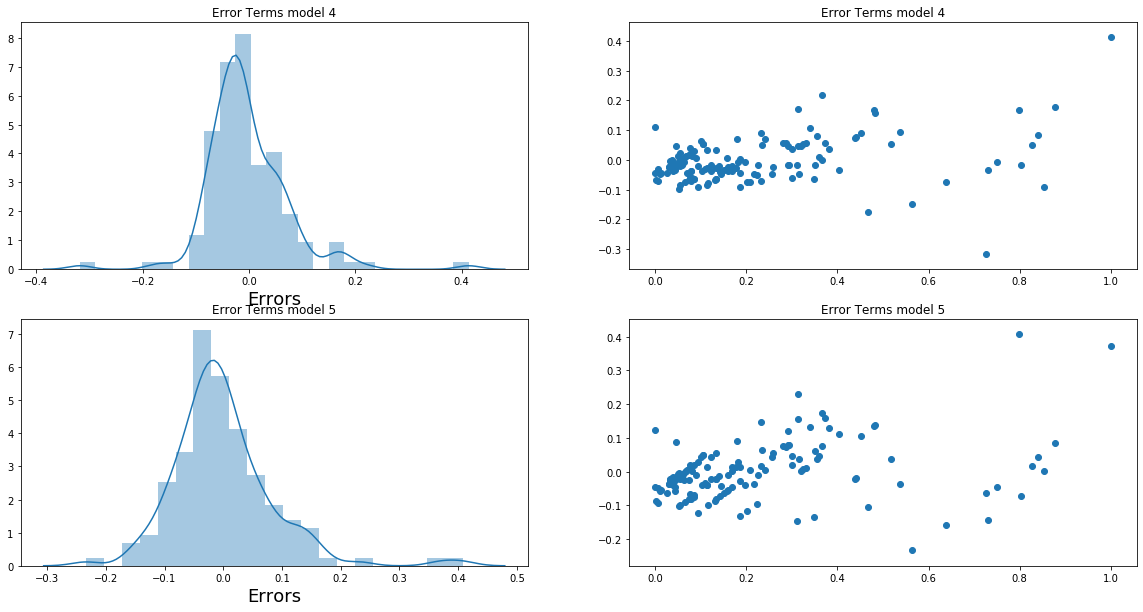

In [42]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(err4)
plt.title('Error Terms model 4')                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.subplot(2,2,2)
plt.title('Error Terms model 4') 
plt.scatter(x=y_train,y=err4)
plt.subplot(2,2,3)
sns.distplot(err5)
plt.title('Error Terms model 5')                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.subplot(2,2,4)
plt.title('Error Terms model 5') 
plt.scatter(x=y_train,y=err5)


## Conclusion:  *Model 4 is selected as the errors are distributed arround 0*.

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [43]:
num_vars = ["horsepower","carwidth","horsepower","price"]
df_test[num_vars]= scaler.fit_transform(df_test[num_vars])


In [44]:
df_test.describe()

,fueltype,aspiration,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.887097,0.822581,99.295161,175.508065,0.375212,2592.596774,4.322581,131.403226,3.381290,0.359521,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,0.319058,0.385142,6.172983,11.681726,0.208977,462.719100,0.882883,43.147273,0.287889,0.252970,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,0.000000,0.000000,86.600000,144.600000,0.000000,1819.000000,4.000000,79.000000,2.540000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,95.700000,169.350000,0.221053,2275.000000,4.000000,108.000000,3.190000,0.140323,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,97.850000,174.800000,0.326316,2535.000000,4.000000,121.000000,3.390000,0.312903,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,103.150000,185.375000,0.421053,2944.250000,4.000000,144.750000,3.620000,0.432258,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,120.900000,208.100000,1.000000,3900.000000,8.000000,308.000000,3.800000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [45]:
y_test = df_test.pop('price')
X_test = df_test

In [46]:
X_test = X_test[["horsepower","carwidth","buick","porsche","jaguar","bmw"]]

In [47]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)
# Making predictions using the fourth model
y_pred= lm_rfe4.predict(X_test)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

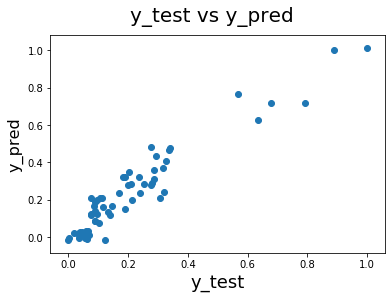

In [48]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [49]:
r2_score(y_test, y_pred)

0.8584344961864936

### The R2 score for the test data set is 0.858 so ~86% of the price in the test dataset is explained by the model.